# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [22]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [41]:
def print_image(image, cmap = None, title = None): 
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.imshow(image, cmap=cmap)

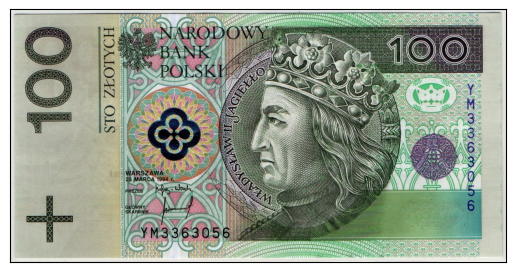

In [6]:
img = cv2.imread(fileName)
print_image(img)

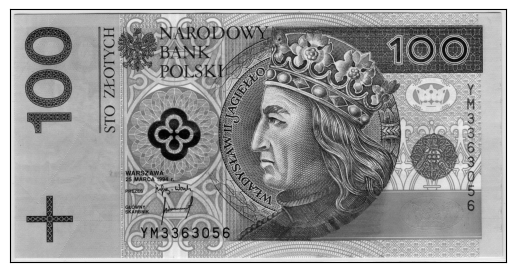

In [13]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print_image(grey_img, 'grey')

In [14]:
def bit_plane_slicing(img):
    bit_planes = []
    for i in range(8):
        bit_plane = (img // (2 ** i)) % 2
        bit_planes.append(bit_plane)
    return bit_planes

In [26]:
bit_planes = bit_plane_slicing(grey_img)

np.set_printoptions(threshold=10)

for i, plane in enumerate(bit_planes):
    print(f"Płaszczyzna bitowa {i}:")
    
    for row in plane:
        print(row) 

    print("\n")
    

Płaszczyzna bitowa 0:
[0 0 0 ... 1 1 1]
[1 0 0 ... 0 1 1]
[1 1 1 ... 1 1 1]
[1 0 1 ... 1 0 1]
[1 0 0 ... 1 1 1]
[1 1 0 ... 0 0 0]
[0 1 1 ... 1 0 0]
[1 1 1 ... 0 1 1]
[1 1 1 ... 1 1 1]
[1 1 0 ... 1 0 0]
[0 1 0 ... 0 0 0]
[0 1 1 ... 1 1 0]
[0 1 0 ... 0 0 1]
[0 0 0 ... 1 0 0]
[1 0 0 ... 0 0 1]
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 0 1]
[0 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 0 0]
[0 1 1 ... 0 1 1]
[0 1 0 ... 1 0 0]
[0 1 1 ... 1 1 0]
[1 0 0 ... 1 1 1]
[1 0 0 ... 1 1 1]
[1 1 0 ... 1 0 0]
[1 1 1 ... 0 0 1]
[1 0 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 0 1 1]
[0 1 1 ... 0 0 0]
[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[1 1 1 ... 0 0 0]
[1 1 0 ... 0 0 0]
[0 1 1 ... 0 0 0]
[0 0 1 ... 0 0 0]
[0 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]
[1 0 0 ... 1 1 0]
[0 1 0 ... 1 1 1]
[1 0 0 ... 1 1 1]
[1 0 1 ... 1 1 1]
[0 1 0 ... 1 0 0]
[0 1 1 ... 0 1 1]
[1 1 0 ... 1 0 0]
[0 0 1 ... 1 0 0]
[1 1 1 ... 0 1 0]
[0 0 1 ... 0 0 1]
[1 0 0 ... 1 1 0]
[1 0 0 ... 0 0 0]
[0 1 0 ... 0 1 1]
[1 1 1 ... 1 0 1]
[0 1 1

In [55]:
layers = [range(7, i - 1, -1) for i in range(8)]

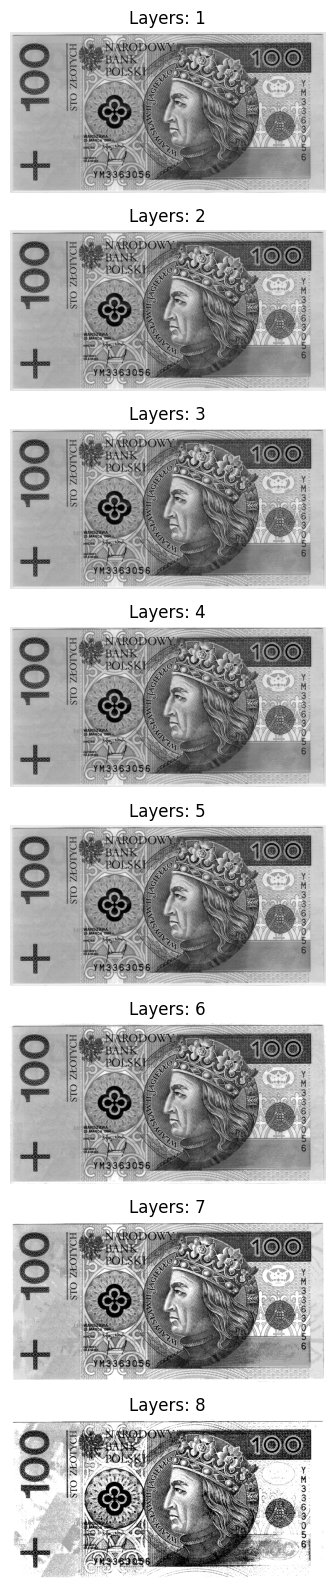

In [59]:
fig, axes = plt.subplots(len(layers), 1, figsize=(8, 2 * len(layers)))

for i, layer in enumerate(layers):
    reconstructed_image = np.zeros_like(grey_img)  
    for j in layer: 
        mask = 1 << j 
        reconstructed_image += (bit_planes[j] * mask) 
        
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

    axes[i].imshow(reconstructed_image, cmap='gray')
    axes[i].set_title(f'Layers: {i + 1}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
